In [70]:
import pandas as pd
from matplotlib import pyplot as plt

In [71]:
filename = '/Users/Miriam/Desktop/HN_survey/2018-FULLANONYMISEDDATA.csv'

In [72]:
df = pd.read_csv(filename)
df = df.drop(df.index[0])
df.head(10)

,What's your gender?,Unnamed: 1,How old are you?,Is your job...,Unnamed: 4,"Roughly, how old is the organisation you work for? (if you are a contractor think of your largest client, if you are in between jobs think of your most recent job)","Roughly, what is the overall turnover of the organisation you work for?�(if you are a contractor think of your largest client, if you are in between jobs think of your most recent job)",Which sector do you think will be most affected by technology innovation and disruption in the next 5 years?,Unnamed: 8,"Agree or disagree? Within ten years, a significant part of my job that I currently perform will be automated",...,Unnamed: 66,Which of the following do you think is the best at judging how good your tech experience is?,What type of organisation is more attractive to you to work in?,Are you happy to answer questions about your salary?,If your job is permanent: what is your base salary?,If your job is contract or freelance: what is your daily rate?,What best describes your job role?,Unnamed: 73,What sector do you work in?,Unnamed: 75
1,Male,NaN,18-24,Permanent,NaN,51-100 years,$501m - $1bn,Energy,NaN,My job is already being affected by automation,...,NaN,an inhouse recruiter,A hybrid (that outsources and also has bespoke...,Yes,< $20K,NaN,Other (please specify),Retail,Retail / Leisure,NaN
2,Male,NaN,40-44,Permanent,NaN,100+ years,$501m - $1bn,Financial Services,NaN,My job is already being affected by automation,...,NaN,an inhouse recruiter,Doesn�t make a difference,Yes,$60K - $69K,NaN,IT operations,NaN,Business / professional services,NaN
3,Male,NaN,30-34,Permanent,NaN,51-100 years,$1bn+,Healthcare,NaN,Disagree,...,NaN,a recruitment agent,Doesn�t make a difference,Yes,$140K - $159K,NaN,"CIO, CTO or VP of IT",NaN,Financial Services,NaN
4,Male,NaN,25-29,Permanent,NaN,6-10 years,$1 - $10m,Business / professional services,NaN,Disagree,...,NaN,an inhouse recruiter,A hybrid (that outsources and also has bespoke...,Yes,< $20K,NaN,Developer,NaN,Gaming,NaN
5,Female,NaN,40-44,Permanent,NaN,21-50 years,$51m - $100m,Business / professional services,NaN,Agree,...,NaN,a recruitment agent,NaN,No,NaN,NaN,Project Management,NaN,Business / professional services,NaN
6,Male,NaN,25-29,Permanent,NaN,51-100 years,$501m - $1bn,Technology / telecoms,NaN,Agree,...,NaN,an inhouse recruiter,One that has lots of bespoke development,Yes,$20K - $29K,NaN,Business Intelligence / Analytics,NaN,FMCG / Consumer,NaN
7,Male,NaN,45-49,Other (please specify),Self-employed,6-10 years,Don�t know,Financial Services,NaN,Agree,...,NaN,a recruitment agent,A hybrid (that outsources and also has bespoke...,No,NaN,NaN,Other (please specify),"Business Development, Sales, Alliances",Business / professional services,NaN
8,Male,NaN,55-59,Permanent,NaN,11-20 years,$11m - $50m,Technology / telecoms,NaN,Disagree,...,NaN,an inhouse recruiter,Doesn�t make a difference,Yes,$80K - $89K,NaN,Database Administrating,NaN,Healthcare,NaN
9,Male,NaN,30-34,Permanent,NaN,6-10 years,$11m - $50m,Financial Services,NaN,Agree,...,NaN,an inhouse recruiter,A hybrid (that outsources and also has bespoke...,Yes,$60K - $69K,NaN,Programme Management,NaN,Energy,NaN
10,Female,NaN,45-49,Freelance,NaN,21-50 years,$1bn+,Technology / telecoms,NaN,Disagree,...,Agile Innovation Leaders who are close to and ...,a recruitment agent,Doesn�t make a difference,Yes,NaN,$1000 - $1499 per day,Other (please specify),SME Program/Project/Integration Manager (SAP ...,Other (please specify),Pharma/Energy/FMCG/Utilities/Manufacturing/Pha...


In [73]:
df2 = df[['Overall, what do you think is the future of bespoke software development in corporate IT departments?', 'How old are you?']]
df2.head(10)

,"Overall, what do you think is the future of bespoke software development in corporate IT departments?",How old are you?
1,It will decline,18-24
2,It will decline,40-44
3,It will stay the same as it is now,30-34
4,It will stay the same as it is now,25-29
5,It will grow,40-44
6,It will grow significantly,25-29
7,It will decline,45-49
8,It will stay the same as it is now,55-59
9,It will grow significantly,30-34
10,It will die (e.g. due to cloud / outsourcing e...,45-49


In [74]:
df2 = pd.pivot_table(df[['Overall, what do you think is the future of bespoke software development in corporate IT departments?', 'How old are you?']],
               index=['Overall, what do you think is the future of bespoke software development in corporate IT departments?'], columns=['How old are you?'], aggfunc=len, fill_value=0)
df2 = df2.reset_index().replace({'Overall, what do you think is the future of bespoke software development in corporate IT departments?': 
                           {'It will grow significantly':'It will grow'}}).groupby('Overall, what do you think is the future of bespoke software development in corporate IT departments?', sort=False).sum()
df2

How old are you?,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65+
"Overall, what do you think is the future of bespoke software development in corporate IT departments?",,,,,,,,,,
It will decline,11,34,61,112,144,160,197,147,70,28
It will die (e.g. due to cloud / outsourcing etc.),5,15,16,32,44,42,49,41,18,3
It will grow,46,107,118,135,126,137,126,99,45,19
It will stay the same as it is now,10,31,36,61,89,91,99,66,39,13


In [75]:
cols = df2.columns
df2[cols] = df2[cols]/df2[cols].sum()
df2

How old are you?,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65+
"Overall, what do you think is the future of bespoke software development in corporate IT departments?",,,,,,,,,,
It will decline,0.152778,0.181818,0.264069,0.329412,0.357320,0.372093,0.418259,0.416431,0.406977,0.444444
It will die (e.g. due to cloud / outsourcing etc.),0.069444,0.080214,0.069264,0.094118,0.109181,0.097674,0.104034,0.116147,0.104651,0.047619
It will grow,0.638889,0.572193,0.510823,0.397059,0.312655,0.318605,0.267516,0.280453,0.261628,0.301587
It will stay the same as it is now,0.138889,0.165775,0.155844,0.179412,0.220844,0.211628,0.210191,0.186969,0.226744,0.206349


In [76]:
df3 = df2.loc['It will grow']
df3

How old are you?
18-24    0.638889
25-29    0.572193
30-34    0.510823
35-39    0.397059
40-44    0.312655
45-49    0.318605
50-54    0.267516
55-59    0.280453
60-64    0.261628
65+      0.301587
Name: It will grow, dtype: float64

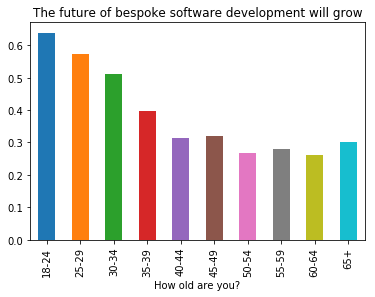

In [77]:
%matplotlib inline
df3.plot.bar(title='The future of bespoke software development will grow')

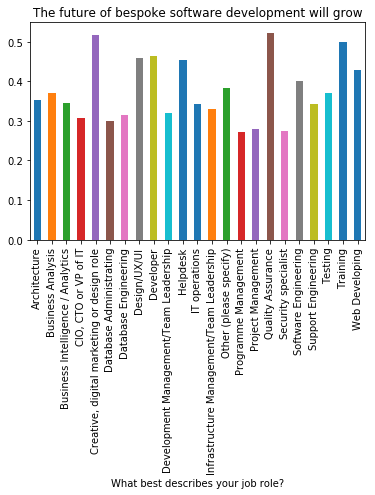

In [79]:
df4 = pd.pivot_table(df[['Overall, what do you think is the future of bespoke software development in corporate IT departments?', 'What best describes your job role?']],
               index=['Overall, what do you think is the future of bespoke software development in corporate IT departments?'], columns=['What best describes your job role?'], aggfunc=len, fill_value=0)
df4 = df4.reset_index().replace({'Overall, what do you think is the future of bespoke software development in corporate IT departments?': 
                           {'It will grow significantly':'It will grow'}}).groupby('Overall, what do you think is the future of bespoke software development in corporate IT departments?', sort=False).sum()

cols = df4.columns
df4[cols] = df4[cols]/df4[cols].sum()

df5 = df4.loc['It will grow']


df5.plot.bar(title='The future of bespoke software development will grow')